# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [326]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [327]:
sinasc_raw = pd.read_csv('part1/1/SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [328]:
sinasc_raw['faixa_latitude'] = np.where(sinasc_raw['munResLat'] > -10.5, 'Acima de -10.5', 'Abaixo de -10.5')

# Selecionar as variáveis numéricas corretas para análise
variaveis = ['PESO', 'IDADEMAE']

# Aplicar o groupby e realizar as operações
resultados = sinasc_raw.groupby('faixa_latitude')[variaveis].agg(
    soma_peso=('PESO', 'sum'),
    media_peso=('PESO', 'mean'),
    minimo_peso=('PESO', 'min'),
    maximo_peso=('PESO', 'max'),
    mediana_peso=('PESO', 'median'),
    desvio_padrao_peso=('PESO', 'std'),
    variancia_peso=('PESO', 'var'),
    soma_idadeMae=('IDADEMAE', 'sum'),
    media_idadeMae=('IDADEMAE', 'mean'),
    minimo_idadeMae=('IDADEMAE', 'min'),
    maximo_idadeMae=('IDADEMAE', 'max'),
    mediana_idadeMae=('IDADEMAE', 'median'),
    desvio_padrao_idadeMae=('IDADEMAE', 'std'),
    variancia_idadeMae=('IDADEMAE', 'var')
)


# Exibir os resultados
resultados



,soma_peso,media_peso,minimo_peso,maximo_peso,mediana_peso,desvio_padrao_peso,variancia_peso,soma_idadeMae,media_idadeMae,minimo_idadeMae,maximo_idadeMae,mediana_idadeMae,desvio_padrao_idadeMae,variancia_idadeMae
faixa_latitude,,,,,,,,,,,,,,
Abaixo de -10.5,42101809,3240.096121,258,5985,3270.0,531.794694,282805.596163,340167,26.178775,12,53,26.0,6.320171,39.944563
Acima de -10.5,45555148,3246.055864,295,5190,3275.0,556.487709,309678.570242,365094,26.014964,11,52,25.0,6.447663,41.572355


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [329]:
sinasc_raw['faixa_area'] = np.where(sinasc_raw['munResArea'] > 3000, 'Acima de 3000', 'Abaixo de 3000')

variaveis = ['APGAR1', 'APGAR5'] 

# Aplicar o groupby e realizar as operações
resultados = sinasc_raw.groupby('faixa_area')[variaveis].agg(
    soma_apgar1=('APGAR1', 'sum'),
    media_apgar1=('APGAR1', 'mean'),
    minimo_apgar1=('APGAR1', 'min'),
    maximo_apgar1=('APGAR1', 'max'),
    mediana_apgar1=('APGAR1', 'median'),
    desvio_padrao_apgar1=('APGAR1', 'std'),
    variancia_apgar1=('APGAR1', 'var'),
    soma_apgar5=('APGAR5', 'sum'),
    media_apgar5=('APGAR5', 'mean'),
    minimo_apgar5=('APGAR5', 'min'),
    maximo_apgar5=('APGAR5', 'max'),
    mediana_apgar5=('APGAR5', 'median'),
    desvio_padrao_apgar5=('APGAR5', 'std'),
    variancia_apgar5=('APGAR5', 'var')
)
resultados

,soma_apgar1,media_apgar1,minimo_apgar1,maximo_apgar1,mediana_apgar1,desvio_padrao_apgar1,variancia_apgar1,soma_apgar5,media_apgar5,minimo_apgar5,maximo_apgar5,mediana_apgar5,desvio_padrao_apgar5,variancia_apgar5
faixa_area,,,,,,,,,,,,,,
Abaixo de 3000,42079.0,8.073484,0.0,10.0,8.0,1.008775,1.017627,47570.0,9.130518,0.0,10.0,9.0,0.801138,0.641821
Acima de 3000,177079.0,8.152808,0.0,10.0,8.0,0.978517,0.957495,199579.0,9.190836,0.0,10.0,9.0,0.787591,0.620299


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [330]:
sinasc_raw['faixa_altitude'] = pd.qcut(sinasc_raw['munResAlt'], q=4, labels=['Baixa', 'Média-Baixa', 'Média-Alta', 'Alta'])


variaveis = ['QTDFILVIVO', 'QTDFILMORT']  

# Aplicar o groupby e realizar as operações
resultados = sinasc_raw.groupby('faixa_altitude')[variaveis].agg(
    soma_filhos_vivos=('QTDFILVIVO', 'sum'),
    media_filhos_vivos=('QTDFILVIVO', 'mean'),
    minimo_filhos_vivos=('QTDFILVIVO', 'min'),
    maximo_filhos_vivos=('QTDFILVIVO', 'max'),
    mediana_filhos_vivos=('QTDFILVIVO', 'median'),
    desvio_padrao_filhos_vivos=('QTDFILVIVO', 'std'),
    variancia_filhos_vivos=('QTDFILVIVO', 'var'),
    soma_filhos_mortos=('QTDFILMORT', 'sum'),
    media_filhos_mortos=('QTDFILMORT', 'mean'),
    minimo_filhos_mortos=('QTDFILMORT', 'min'),
    maximo_filhos_mortos=('QTDFILMORT', 'max'),
    mediana_filhos_mortos=('QTDFILMORT', 'median'),
    desvio_padrao_filhos_mortos=('QTDFILMORT', 'std'),
    variancia_filhos_mortos=('QTDFILMORT', 'var')
)
resultados

C:\Users\djgam\AppData\Local\Temp\ipykernel_1800\690906598.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultados = sinasc_raw.groupby('faixa_altitude')[variaveis].agg(


,soma_filhos_vivos,media_filhos_vivos,minimo_filhos_vivos,maximo_filhos_vivos,mediana_filhos_vivos,desvio_padrao_filhos_vivos,variancia_filhos_vivos,soma_filhos_mortos,media_filhos_mortos,minimo_filhos_mortos,maximo_filhos_mortos,mediana_filhos_mortos,desvio_padrao_filhos_mortos,variancia_filhos_mortos
faixa_altitude,,,,,,,,,,,,,,
Baixa,8976.0,1.177798,0.0,12.0,1.0,1.236798,1.529670,2282.0,0.309550,0.0,9.0,0.0,0.642375,0.412645
Média-Baixa,5430.0,1.189225,0.0,14.0,1.0,1.319208,1.740309,1238.0,0.284860,0.0,9.0,0.0,0.639574,0.409055
Média-Alta,6354.0,0.922608,0.0,9.0,1.0,1.041525,1.084773,1585.0,0.230949,0.0,5.0,0.0,0.534301,0.285477
Alta,6066.0,0.950784,0.0,30.0,1.0,1.079861,1.166099,1538.0,0.242281,0.0,28.0,0.0,0.638724,0.407968


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


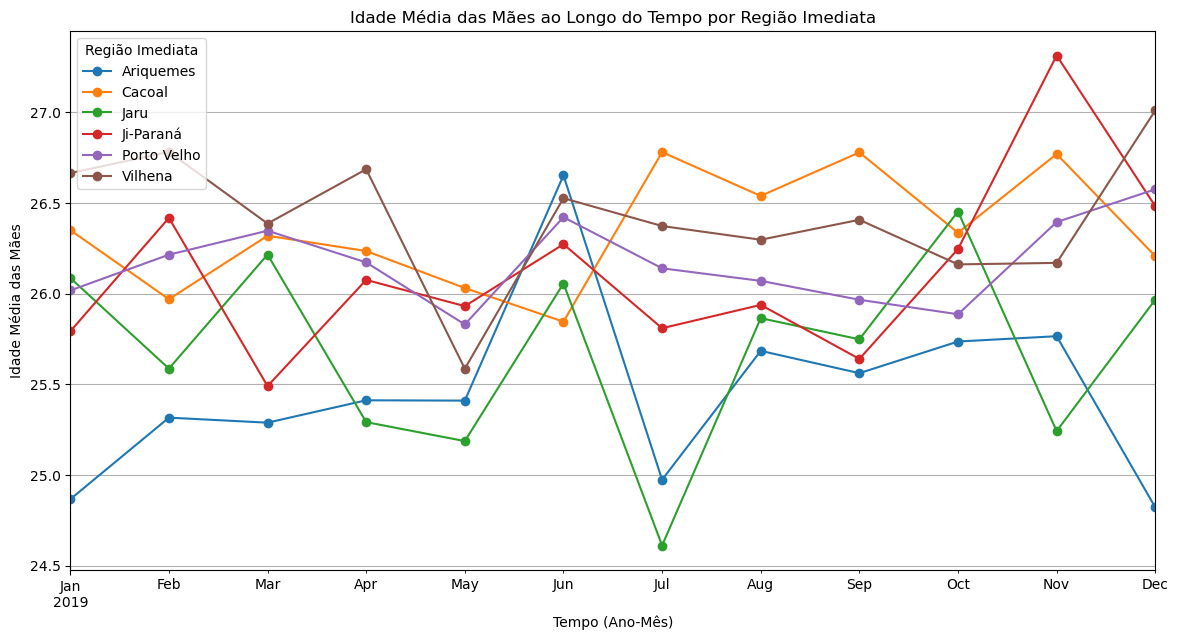

In [331]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

# Mapear as cidades para suas respectivas regiões imediatas
sinasc_raw['RegiaoImediata'] = sinasc_raw['munResNome'].map(imediatas)

# Converter a coluna de data de nascimento para datetime
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

# Agrupar por ano-mês e região imediata, e calcular a idade média
sinasc_raw['AnoMes'] = sinasc_raw['DTNASC'].dt.to_period('M')
idade_media = sinasc_raw.groupby(['AnoMes', 'RegiaoImediata'])['IDADEMAE'].mean().unstack()

# Plot
idade_media.plot(figsize=(14, 7), marker='o')
plt.title('Idade Média das Mães ao Longo do Tempo por Região Imediata')
plt.xlabel('Tempo (Ano-Mês)')
plt.ylabel('Idade Média das Mães')
plt.legend(title='Região Imediata')
plt.grid(True)
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [353]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M'
html = pd.read_html(url,match= 'Dados de 2010')
dd = html[0]

In [354]:
dd

Posição                  Município      Dados de 2010  \
              Posição                  Município      IDH municipal   
     IDH-M muito alto           IDH-M muito alto   IDH-M muito alto   
0    nenhum município           nenhum município   nenhum município   
1          IDH-M alto                 IDH-M alto         IDH-M alto   
2                   1                Porto Velho              0.736   
3                   2                    Vilhena              0.731   
4                   3                     Cacoal              0.718   
5                   4                  Ji-Paraná              0.714   
6                   5              Pimenta Bueno              0.710   
7                   6                  Ariquemes              0.702   
8                   7             Rolim de Moura              0.700   
9         IDH-M médio                IDH-M médio        IDH-M médio   
10                  8                 Cerejeiras              0.692   
11                  9                       Jaru              0.689   
12                 10          Colorado do Oeste              0.685   
13                 11        Ouro Preto do Oeste              0.682   
14                 12            Espigão d'Oeste              0.672   
15                 13        Santa Luzia d'Oeste              0.670   
16                 14       Pimenteiras do Oeste              0.665   
17                 15          Presidente Médici              0.664   
18                 16               Castanheiras              0.658   
19                 17              Guajará-Mirim              0.657   
20                 18                Chupinguaia              0.652   
21                 19                     Cabixi              0.650   
22                 20         Candeias do Jamari              0.649   
23                 20         São Felipe d'Oeste              0.649   
24                 22                Cacaulândia              0.646   
25                 22      São Miguel do Guaporé              0.646   
26                 24           Mirante da Serra              0.643   
27                 24           Alvorada d'Oeste              0.643   
28                 24              Teixeirópolis              0.643   
29                 24   Nova Brasilândia d'Oeste              0.643   
30                 24                 Rio Crespo              0.643   
31                 29      Primavera de Rondônia              0.641   
32                 29      Alta Floresta d'Oeste              0.641   
33                 31         Ministro Andreazza              0.638   
34                 32    Novo Horizonte do Oeste              0.634   
35                 33            Vale do Paraíso              0.627   
36                 34               Alto Paraíso              0.625   
37                 35                    Parecis              0.617   
38                 36                    Buritis              0.616   
39                 37            Itapuã do Oeste              0.614   
40                 38                 Corumbiara              0.613   
41                 39                    Cujubim              0.612   
42                 40              Costa Marques              0.611   
43                 40   São Francisco do Guaporé              0.611   
44                 42                      Urupá              0.609   
45                 43                Monte Negro              0.607   
46        IDH-M baixo                IDH-M baixo        IDH-M baixo   
47                 44               Seringueiras              0.598   
48                 45  Governador Jorge Teixeira              0.596   
49                 45         Machadinho d'Oeste              0.596   
50                 47     Campo Novo de Rondônia              0.593   
51                 48    Alto Alegre dos Parecis              0.592   
52                 49                  Theobroma              0.589   
53                 50                 

In [355]:
df = dd
df.columns

MultiIndex([(      'Posição',         'Posição', 'IDH-M muito alto'),
            (    'Município',       'Município', 'IDH-M muito alto'),
            ('Dados de 2010',   'IDH municipal', 'IDH-M muito alto'),
            ('Dados de 2010',       'IDH renda', 'IDH-M muito alto'),
            ('Dados de 2010', 'IDH longevidade', 'IDH-M muito alto'),
            ('Dados de 2010',    'IDH educação', 'IDH-M muito alto')],
           )

In [356]:
df.columns = ['Posição','Município','IDH municipal','IDH renda','IDH longevidade','IDH educação']

In [357]:
df.set_index('Posição')

df

,Posição,Município,IDH municipal,IDH renda,IDH longevidade,IDH educação
0,nenhum município,nenhum município,nenhum município,nenhum município,nenhum município,nenhum município
1,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto
2,1,Porto Velho,0.736,0.764,0.819,0.638
3,2,Vilhena,0.731,0.734,0.808,0.659
4,3,Cacoal,0.718,0.727,0.821,0.620
5,4,Ji-Paraná,0.714,0.728,0.810,0.617
6,5,Pimenta Bueno,0.710,0.726,0.803,0.613
7,6,Ariquemes,0.702,0.716,0.806,0.600
8,7,Rolim de Moura,0.700,0.709,0.808,0.598
9,IDH-M médio,IDH-M médio,IDH-M médio,IDH-M médio,IDH-M médio,IDH-M médio


In [366]:
# Seleciona as colunas desejadas
df2 = df[['Município', 'IDH educação']]

# Remove linhas indesejadas caso existam (ajustar a lógica conforme os dados reais)
df2 = df2[~df2['Município'].isin(['IDH-M alto','IDH-M médio', 'IDH-M baixo', 'IDH-M muito baixo', 'nenhum município'])]

# Função para mapear os valores de IDH
def mapi(idh_educacao):
    if 0.400 <= idh_educacao <= 0.500:
        return 'Educação Baixa'
    elif 0.500 < idh_educacao <= 0.600:
        return 'Educação Média'
    elif 0.600 < idh_educacao <= 0.700:
        return 'Educação Acima da Média'
    else:
        return 'Educação Alta'

# Converte a coluna 'IDH educação' para float
df2['IDH educação'] = df2['IDH educação'].astype(float)
df2.reset_index(drop=True, inplace=True)
# Aplica a função mapi para criar a nova coluna 'Situação'
df2['Nivel de escolaridade'] = df2['IDH educação'].apply(mapi)
df2

,Município,IDH educação,Nivel de escolaridade
0,Porto Velho,0.638,Educação Acima da Média
1,Vilhena,0.659,Educação Acima da Média
2,Cacoal,0.620,Educação Acima da Média
3,Ji-Paraná,0.617,Educação Acima da Média
4,Pimenta Bueno,0.613,Educação Acima da Média
5,Ariquemes,0.600,Educação Média
6,Rolim de Moura,0.598,Educação Média
7,Cerejeiras,0.602,Educação Acima da Média
8,Jaru,0.577,Educação Média
9,Colorado do Oeste,0.584,Educação Média


In [367]:
df3 = df2.set_index('Nivel de escolaridade')
mapping = {
    'Educação Baixa': 'Necessita de atencao',
    'Educação Média': 'Precisa de investimento',
    'Educação Acima da Média': 'Em Progresso',
}
df3.groupby(mapping).sum()


,Município,IDH educação
Nivel de escolaridade,,
Em Progresso,Porto VelhoVilhenaCacoalJi-ParanáPimenta Bueno...,3.749
Necessita de atencao,Mirante da SerraTeixeirópolisVale do ParaísoAl...,10.063
Precisa de investimento,AriquemesRolim de MouraJaruColorado do OesteOu...,13.042


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [368]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM'
html = pd.read_html(url,match= 'IFDM')
ifdm = html[0]

In [369]:
ifdm

,Posição,Município,IFDM Consolidado (2013)
,Desenvolvimento alto,Desenvolvimento alto,Desenvolvimento alto
0,nenhum município,nenhum município,nenhum município
1,Desenvolvimento moderado,Desenvolvimento moderado,Desenvolvimento moderado
2,1º,Ariquemes,0.7746
3,2º,Vilhena,0.7465
4,3º,Pimenta Bueno,0.7383
5,4º,Porto Velho,0.7257
6,5º,Ji-Paraná,0.7117
7,6º,Cacoal,0.7111
8,7º,Santa Luzia d'Oeste,0.6850


In [370]:
ifdm.columns = ['Posição','Município','IFDM Consolidado (2013)']
ifdm = ifdm[~ifdm['Município'].isin(['Desenvolvimento moderado', 'Desenvolvimento regular', 'Desenvolvimento baixo', 'nenhum município'])]
ifdm.reset_index(drop=True, inplace=True)
ifdm

,Posição,Município,IFDM Consolidado (2013)
0,1º,Ariquemes,0.7746
1,2º,Vilhena,0.7465
2,3º,Pimenta Bueno,0.7383
3,4º,Porto Velho,0.7257
4,5º,Ji-Paraná,0.7117
5,6º,Cacoal,0.7111
6,7º,Santa Luzia d'Oeste,0.6850
7,8º,Rolim de Moura,0.6785
8,9º,Chupinguaia,0.6766
9,10º,São Miguel do Guaporé,0.6699


In [371]:
def mapi_ifdm(ifdmConsolidado):
    if 0.6000 <= ifdmConsolidado <= 0.8000:
        return 'Desenvolvimento moderado'
    elif 0.4000 < ifdmConsolidado < 0.6000:
        return 'Desenvolvimento regular'
    elif ifdmConsolidado < 0.4000:
        return 'Desenvolvimento Baixo'
        

ifdm['IFDM Consolidado (2013)'] = ifdm['IFDM Consolidado (2013)'].astype(float)


ifdm['Nivel de Desenvolvimento'] = ifdm['IFDM Consolidado (2013)'].apply(mapi_ifdm)

ifdm2 = ifdm.set_index('Nivel de Desenvolvimento')

mapear = {
    'Desenvolvimento moderado': 'Desenvolvimento moderado',
    'Desenvolvimento regular' : 'Desenvolvimento regular',
    'Desenvolvimento Baixo': 'Desenvolvimento Baixo'
}
ifdm2 =ifdm2.groupby(mapear).sum()
ifdm2.iloc[0,0] = '1 a 26'
ifdm2.iloc[1,0] = '27 a 52'
ifdm2


C:\Users\djgam\AppData\Local\Temp\ipykernel_1800\4244429639.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ifdm['IFDM Consolidado (2013)'] = ifdm['IFDM Consolidado (2013)'].astype(float)
C:\Users\djgam\AppData\Local\Temp\ipykernel_1800\4244429639.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ifdm['Nivel de Desenvolvimento'] = ifdm['IFDM Consolidado (2013)'].apply(mapi_ifdm)


,Posição,Município,IFDM Consolidado (2013)
Nivel de Desenvolvimento,,,
Desenvolvimento moderado,1 a 26,AriquemesVilhenaPimenta BuenoPorto VelhoJi-Par...,17.1579
Desenvolvimento regular,27 a 52,Espigão d'OesteSeringueirasAlvorada d'OesteIta...,14.4654


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [417]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB'
html = pd.read_html(url,match= 'PIB')
Pib1 = html[0]
Pib2 = html[1]
Pib3 = html[2]
Pib1,Pib2,Pib3

(  Posição                      Município         PIB Alteração
   Em 2019 Mudança (2014)       Município         PIB Alteração
 0       1            (0)     Porto Velho  17 912 070       NaN
 1       2            (0)       Ji-Paraná   3 783 972       NaN
 2       3            (0)         Vilhena   2 831 175       NaN
 3       4            (0)       Ariquemes   2 579 830       NaN
 4       5            (0)          Cacoal   2 261 644       NaN
 5       6            (0)            Jaru   1 500 890       NaN
 6       7            (0)  Rolim de Moura   1 283 434       NaN
 7       8            (0)   Pimenta Bueno   1 164 877       NaN,
   Posição                             Município      PIB Alteração
   Em 2019 Mudança (2014)              Município      PIB Alteração
 0       9            (0)          Guajará-Mirim  893 000       NaN
 1      10            (0)    Ouro Preto do Oeste  834 000       NaN
 2      11            (1)                Buritis  726 000       NaN
 3      12         

In [424]:
##df2['Nivel de escolaridade']
def limpeza(o):
    o['Nivel de Escolaridade'] = df2['Nivel de escolaridade']
    o.drop('Alteração',axis=1)
    o.columns = ['Posição 2019','Alt-Posição 2014','Município','PIB','Alteração','Nivel de Escolaridade']

limpeza(Pib1)
Pib3.drop('Alteração',axis=1)

,Posição 2019,Alt-Posição 2014,Município,PIB,Nivel de Escolaridade
0,18,(3),Alta Floresta do Oeste,496 000,Educação Acima da Média
1,19,(3),Presidente Médici,428 000,Educação Acima da Média
2,20,(3),Cujubim,385 000,Educação Acima da Média
3,21,(1),Nova Brasilândia do Oeste,360 000,Educação Acima da Média
4,22,(2),Alto Paraíso,358 000,Educação Acima da Média
5,23,(2),São Francisco do Guaporé,353 000,Educação Média
6,24,(4),Colorado do Oeste,335 000,Educação Média


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

1. Apesar das diferenças na evolução e desenvolvimento dos municípios, não há uma grande variação em relação à longevidade da população.

2. Devido à alta altitude, parece haver uma tendência maior de natalidade entre as populações.

3. Apesar de Porto velho ter a capital e possuir mais recursos, o municipio de Ariquemes e o que mais evoluiu.